In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\GURU\Downloads\diabetes_prediction_dataset.csv")

In [3]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Data Cleaning

# 1. Missing value Treatment

In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

This data doesnt have any missing values

for example if there is any missing values, first check the missing value column in numerical or categorical

1. If the column is numerical impute the missing value with mean or median, if you use mean it has highly affected in outliers so impute with median always better.
2. If the missing value column is categorical impute the missing data with the least count(category) in the same column

# dtype conversion

In [8]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [11]:
data.gender=le.fit_transform(data.gender)

In [12]:
data.gender.value_counts()

0    58552
1    41430
2       18
Name: gender, dtype: int64

In [13]:
data.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [14]:
data.smoking_history=le.fit_transform(data.smoking_history)

In [15]:
data.smoking_history.value_counts()

0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: smoking_history, dtype: int64

In [16]:
data.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# Checking the value count of target variable

In [17]:
data.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

# Base model

# Splitting data

In [18]:
x=data.iloc[:,0:-1]
x.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158


In [19]:
y=data.iloc[:,-1]
y.head(3)

0    0
1    0
2    0
Name: diabetes, dtype: int64

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

In [22]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((80000, 8), (20000, 8), (80000,), (20000,))

# 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [24]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
lr_p=lr.predict(xtest)
lr_p

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
#confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
lr_cf=confusion_matrix(lr_p,ytest)
lr_cf

array([[18123,   623],
       [  204,  1050]], dtype=int64)

In [29]:
lr_ac=lr_cf.diagonal().sum()/lr_cf.sum()*100
lr_ac

95.865

In [30]:
print(classification_report(lr_p,ytest))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18746
           1       0.63      0.84      0.72      1254

    accuracy                           0.96     20000
   macro avg       0.81      0.90      0.85     20000
weighted avg       0.97      0.96      0.96     20000



In [31]:
lg_pre_score= precision_score(ytest,lr_p)
lg_re_score= recall_score(ytest,lr_p)
lg_f1_score= f1_score(ytest,lr_p)
lg_pre_score,lg_re_score,lg_f1_score

(0.8373205741626795, 0.6276150627615062, 0.717458148274684)

# 2.Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [33]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
dt_p=dt.predict(xtest)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
#confusion matrix

In [36]:
dt_cf=confusion_matrix(dt_p,ytest)
dt_cf

array([[17836,   423],
       [  491,  1250]], dtype=int64)

In [37]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

95.43

In [38]:
print(classification_report(dt_p,ytest))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18259
           1       0.75      0.72      0.73      1741

    accuracy                           0.95     20000
   macro avg       0.86      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [39]:
dt_pre_score= precision_score(ytest,lr_p)
dt_re_score= recall_score(ytest,lr_p)
dt_f1_score= f1_score(ytest,lr_p)
dt_pre_score,dt_re_score,dt_f1_score

(0.8373205741626795, 0.6276150627615062, 0.717458148274684)

# 3.Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [41]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [42]:
rf_p=rf.predict(xtest)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#confusion matrix

In [44]:
rf_cf=confusion_matrix(rf_p,ytest)
rf_cf

array([[18259,   513],
       [   68,  1160]], dtype=int64)

In [45]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

97.095

In [46]:
print(classification_report(rf_p,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18772
           1       0.69      0.94      0.80      1228

    accuracy                           0.97     20000
   macro avg       0.84      0.96      0.89     20000
weighted avg       0.98      0.97      0.97     20000



In [47]:
rf_pre_score= precision_score(ytest,rf_p)
rf_re_score= recall_score(ytest,rf_p)
rf_f1_score= f1_score(ytest,rf_p)
rf_pre_score,rf_re_score,rf_f1_score

(0.9446254071661238, 0.6933652121936641, 0.7997242330230956)

# 4.KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [49]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [50]:
knn_p=knn.predict(xtest)
knn_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
#confusion matrix

In [52]:
knn_cf=confusion_matrix(knn_p,ytest)
knn_cf

array([[18201,   778],
       [  126,   895]], dtype=int64)

In [53]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

95.48

In [54]:
print(classification_report(knn_p,ytest))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18979
           1       0.53      0.88      0.66      1021

    accuracy                           0.95     20000
   macro avg       0.76      0.92      0.82     20000
weighted avg       0.97      0.95      0.96     20000



In [55]:
knn_pre_score= precision_score(ytest,knn_p)
knn_re_score= recall_score(ytest,knn_p)
knn_f1_score= f1_score(ytest,knn_p)
knn_pre_score,knn_re_score,knn_f1_score

(0.8765915768854065, 0.5349671249252839, 0.6644394951744618)

# 5.SVM

In [56]:
from sklearn.svm import SVC
svc=SVC()

In [57]:
svc.fit(xtrain,ytrain)

SVC()

In [58]:
svc_p=svc.predict(xtest)
svc_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
#confusion matrix

In [60]:
svc_cf=confusion_matrix(svc_p,ytest)
svc_cf

array([[18327,   998],
       [    0,   675]], dtype=int64)

In [61]:
svc_ac=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_ac

95.00999999999999

In [62]:
print(classification_report(svc_p,ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     19325
           1       0.40      1.00      0.57       675

    accuracy                           0.95     20000
   macro avg       0.70      0.97      0.77     20000
weighted avg       0.98      0.95      0.96     20000



In [63]:
svm_pre_score= precision_score(ytest,svc_p)
svm_re_score= recall_score(ytest,svc_p)
svm_f1_score= f1_score(ytest,svc_p)
svm_pre_score,svm_re_score,svm_f1_score

(1.0, 0.40346682606096834, 0.5749574105621805)

# 6.Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [65]:
nb.fit(xtrain,ytrain)

MultinomialNB()

In [66]:
nb_p=nb.predict(xtest)
nb_p

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [67]:
#confusion matrix

In [68]:
nb_m=confusion_matrix(nb_p,ytest)
nb_m

array([[17623,  1218],
       [  704,   455]], dtype=int64)

In [69]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

90.39

In [70]:
print(classification_report(nb_p,ytest))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     18841
           1       0.27      0.39      0.32      1159

    accuracy                           0.90     20000
   macro avg       0.62      0.66      0.63     20000
weighted avg       0.92      0.90      0.91     20000



In [71]:


nb_pre_score= precision_score(ytest,nb_p)
nb_re_score= recall_score(ytest,nb_p)
nb_f1_score= f1_score(ytest,nb_p)
nb_pre_score,nb_re_score,nb_f1_score

(0.3925798101811907, 0.2719665271966527, 0.3213276836158192)

# 7.XG Boost

In [72]:
#pip install xgboost

In [73]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [74]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
xgb_p=xgb.predict(xtest)
xgb_p

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
#confusion matrix

In [77]:
xgb_cf=confusion_matrix(xgb_p,ytest)
xgb_cf

array([[18276,   508],
       [   51,  1165]], dtype=int64)

In [78]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

97.205

In [79]:
print(classification_report(xgb_p,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18784
           1       0.70      0.96      0.81      1216

    accuracy                           0.97     20000
   macro avg       0.85      0.97      0.90     20000
weighted avg       0.98      0.97      0.97     20000



In [80]:
xgb_pre_score= precision_score(ytest,xgb_p)
xgb_re_score= recall_score(ytest,xgb_p)
xgb_f1_score= f1_score(ytest,xgb_p)
xgb_pre_score,xgb_re_score,xgb_f1_score

(0.9580592105263158, 0.6963538553496712, 0.8065074420214607)

In [81]:
list1=["LG","DT","RF","KNN","SVM","NB","XG_B"]
list2=[lr_ac,dt_ac,rf_ac,knn_ac,svc_ac,nb_acc,xgb_ac]
list3=[lg_pre_score,dt_pre_score,rf_pre_score,knn_pre_score,svm_pre_score,nb_pre_score,xgb_pre_score]
list4=[lg_re_score,dt_re_score,rf_re_score,knn_re_score,svm_re_score,nb_re_score,xgb_re_score]
list5=[lg_f1_score,dt_f1_score,rf_f1_score,knn_f1_score,svm_f1_score,nb_f1_score,xgb_f1_score]

In [82]:
Basemodel_final= pd.DataFrame({"basemodel name":list1,"accuracy":list2,"precision":list3,"recall":list4,"f1score":list5})
Basemodel_final

,basemodel name,accuracy,precision,recall,f1score
0,LG,95.865,0.837321,0.627615,0.717458
1,DT,95.430,0.837321,0.627615,0.717458
2,RF,97.095,0.944625,0.693365,0.799724
3,KNN,95.480,0.876592,0.534967,0.664439
4,SVM,95.010,1.000000,0.403467,0.574957
5,NB,90.390,0.392580,0.271967,0.321328
6,XG_B,97.205,0.958059,0.696354,0.806507


# BASEMODEL CONCLUSION:

# Class imbalance

In [83]:
c_0,c_1=data["diabetes"].value_counts()
c_0,c_1

(91500, 8500)

In [84]:
train_0=data[data["diabetes"]==0]
train_1=data[data["diabetes"]==1]

In [85]:
train_0.shape,train_1.shape

((91500, 9), (8500, 9))

# Random Under sampling

In [86]:
class_0under=train_0.sample(c_1)

In [87]:
class_0under.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
52385,0,50.0,1,0,4,25.66,5.7,85,0
35336,0,80.0,0,0,3,24.13,5.7,145,0
94544,0,33.0,0,0,4,39.60,6.5,140,0


In [88]:
class_0under.diabetes.value_counts()

0    8500
Name: diabetes, dtype: int64

In [89]:
class0_1=pd.concat([class_0under,train_1],axis=0)

In [90]:
class0_1.diabetes.value_counts()

0    8500
1    8500
Name: diabetes, dtype: int64

In [91]:
class0_1.shape

(17000, 9)

In [92]:
c_x=class0_1.iloc[:,0:-1]
c_y=class0_1.iloc[:,-1]

In [93]:
c_x.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
52385,0,50.0,1,0,4,25.66,5.7,85
35336,0,80.0,0,0,3,24.13,5.7,145
94544,0,33.0,0,0,4,39.60,6.5,140


In [94]:
c_y.head(3)

52385    0
35336    0
94544    0
Name: diabetes, dtype: int64

In [95]:
xtr,xte,ytr,yte=train_test_split(c_x,c_y,test_size=0.2,random_state=100)

In [96]:
xtr.shape,xte.shape,ytr.shape,yte.shape

((13600, 8), (3400, 8), (13600,), (3400,))

# Random over sampling

In [97]:
#train_1.shape

In [98]:
#class_1over=train_1.sample(c_0,replace=True)

In [99]:
#class_1over.shape

In [100]:
#class1_0=pd.concat([class_1over,train_0],axis=0)

In [101]:
#class1_0.shape

# Outlier treatment

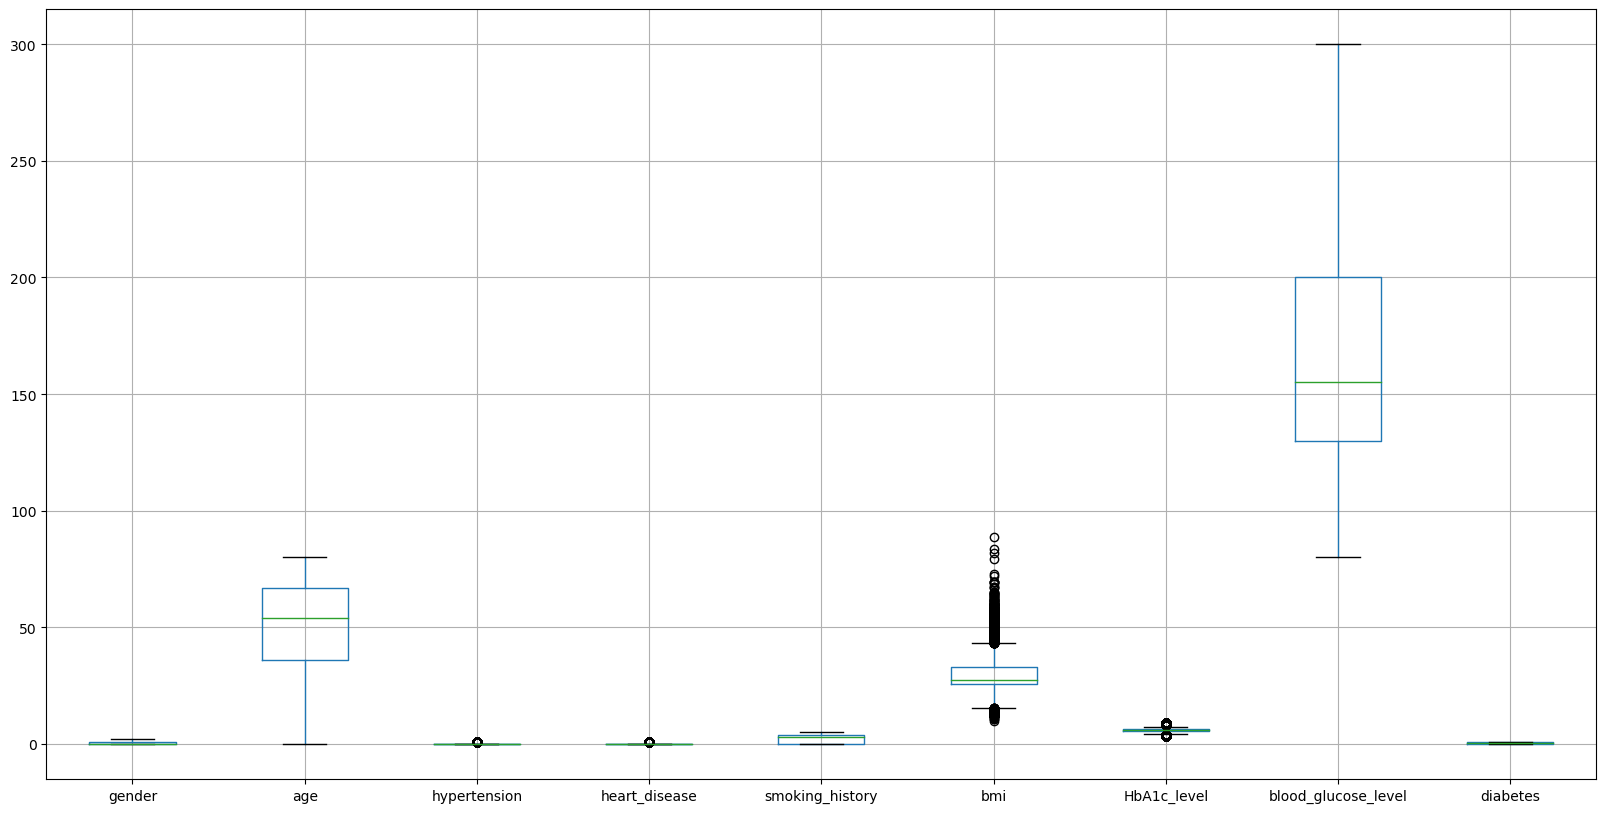

In [102]:
class0_1.boxplot(figsize=(20,10))
plt.show()

In [103]:
class0_1.bmi.value_counts()

27.32    3778
27.80      21
28.00      20
32.90      19
25.60      19
         ... 
59.99       1
88.72       1
14.38       1
34.22       1
38.31       1
Name: bmi, Length: 3327, dtype: int64

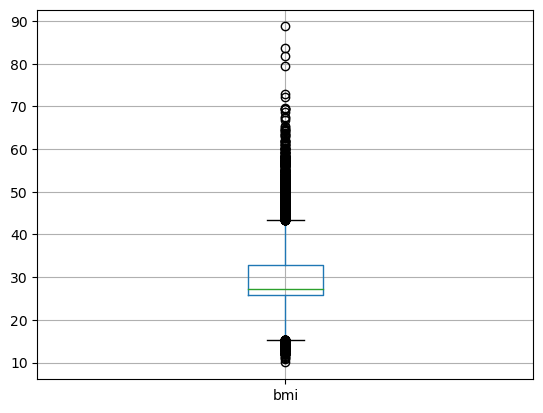

In [104]:
class0_1.boxplot(column="bmi")
plt.show()

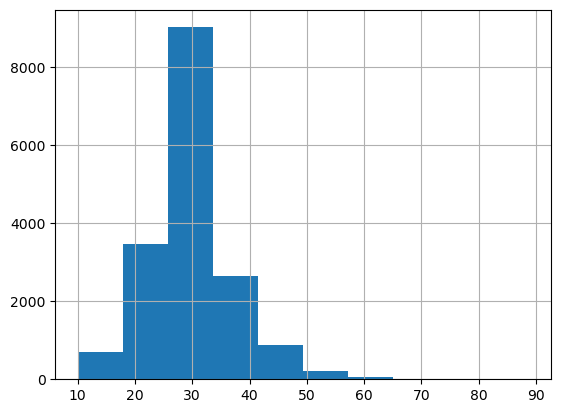

In [105]:
class0_1.bmi.hist()
plt.show()

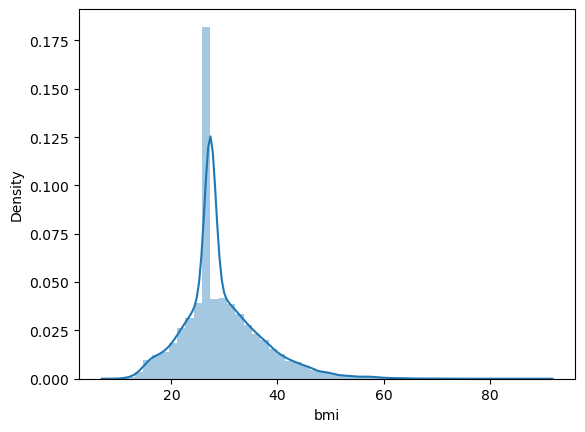

In [106]:
sns.distplot(class0_1.bmi)
plt.show()

In [107]:
IQR=class0_1.bmi.quantile(0.75)-class0_1.bmi.quantile(0.25)
IQR

7.020000000000003

In [108]:
iub1=class0_1["bmi"].quantile(0.75)+(IQR*3)
iub1

53.94000000000001

In [109]:
class0_1.loc[class0_1["bmi"]>53,"bmi"]=53

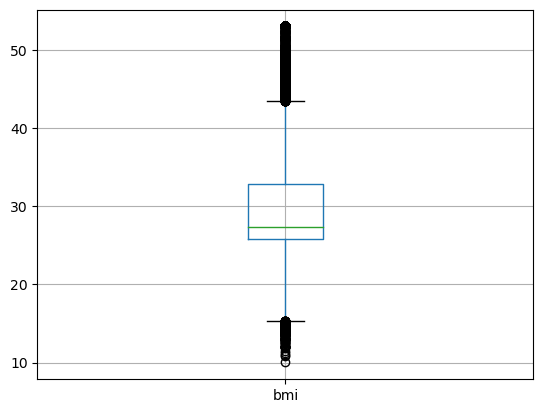

In [110]:
class0_1.boxplot(column="bmi")
plt.show()

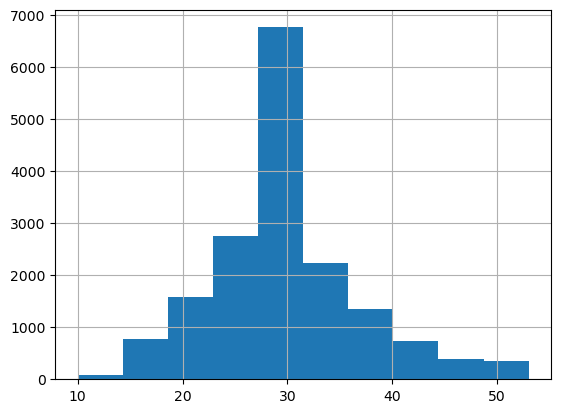

In [111]:
class0_1.bmi.hist()
plt.show()

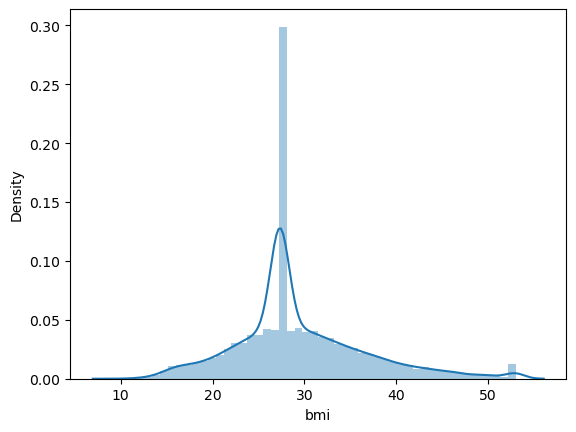

In [112]:
sns.distplot(class0_1.bmi)
plt.show()

In [113]:
class0_1.HbA1c_level.value_counts()

6.0    1420
5.7    1418
6.6    1402
5.8    1379
6.2    1356
6.1    1331
6.5    1303
4.5     707
3.5     706
4.0     696
5.0     694
4.8     693
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: HbA1c_level, dtype: int64

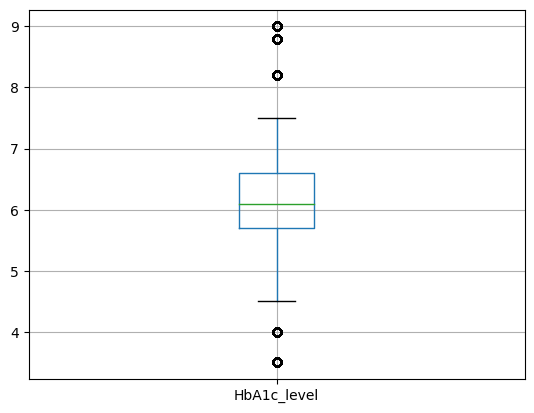

In [114]:
class0_1.boxplot(column="HbA1c_level")
plt.show()

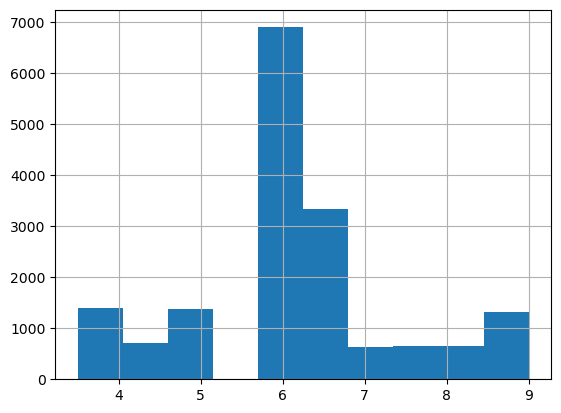

In [115]:
class0_1.HbA1c_level.hist()
plt.show()

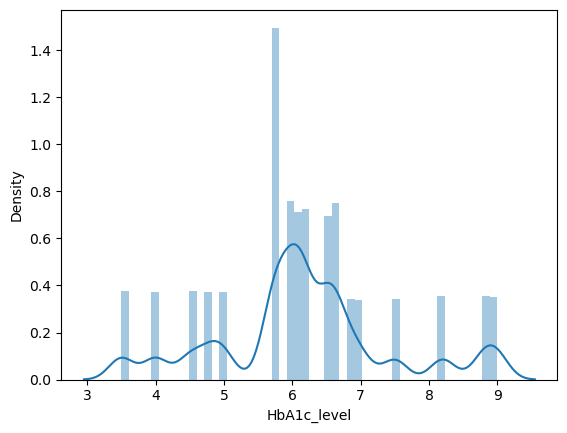

In [116]:
sns.distplot(class0_1.HbA1c_level)
plt.show()

In [117]:
l_b=class0_1["HbA1c_level"].mean()-3*class0_1["HbA1c_level"].std()
u_b=class0_1["HbA1c_level"].mean()+3*class0_1["HbA1c_level"].std()
l_b,u_b

(2.3268379504836547, 10.006314990692815)

In [118]:
class0_1.loc[class0_1["HbA1c_level"]<2.3145764264689177,"HbA1c_level"]=2.3145764264689177
class0_1.loc[class0_1["HbA1c_level"]>10.015376514707551,"HbA1c_level"]=10.015376514707551

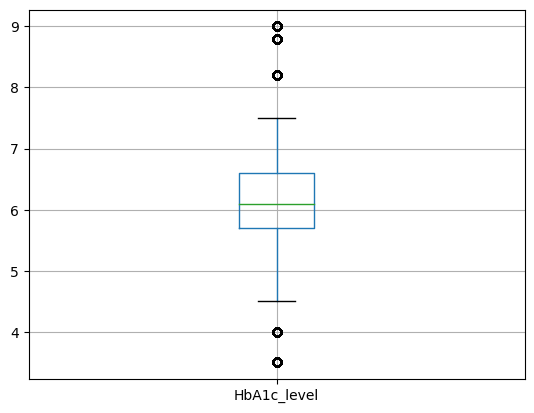

In [119]:
class0_1.boxplot(column="HbA1c_level")
plt.show()

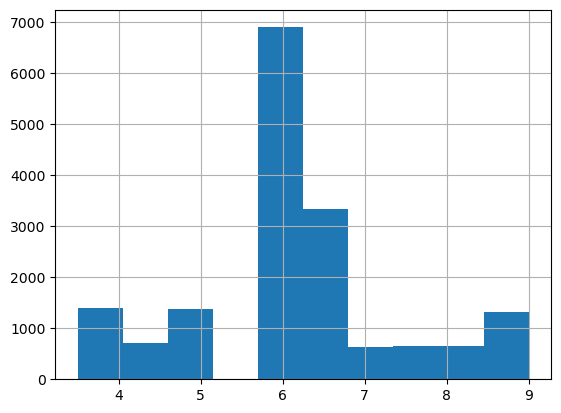

In [120]:
class0_1.HbA1c_level.hist()
plt.show()

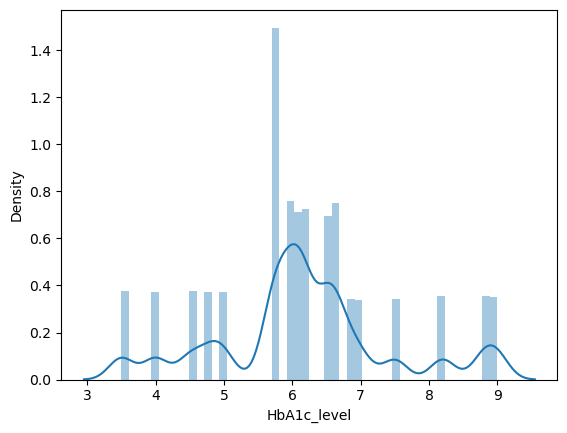

In [121]:
sns.distplot(class0_1.HbA1c_level)
plt.show()

In [122]:
class0_1.skew()

gender                 0.245376
age                   -0.548593
hypertension           1.932436
heart_disease          2.888336
smoking_history       -0.291502
bmi                    0.806858
HbA1c_level            0.221572
blood_glucose_level    0.838828
diabetes               0.000000
dtype: float64

# VISUALIZATION

In [123]:
data_cor = class0_1.corr()
data_cor

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.007666,0.016810,0.092209,-0.060121,-0.031116,0.045679,0.035706,0.071924
age,0.007666,1.000000,0.251309,0.254568,0.222459,0.274066,0.287008,0.263345,0.482986
hypertension,0.016810,0.251309,1.000000,0.099008,0.109001,0.157074,0.159894,0.137921,0.258791
heart_disease,0.092209,0.254568,0.099008,1.000000,0.026814,0.048741,0.122714,0.116500,0.211192
smoking_history,-0.060121,0.222459,0.109001,0.026814,1.000000,0.173801,0.105482,0.090264,0.174313
bmi,-0.031116,0.274066,0.157074,0.048741,0.173801,1.000000,0.204913,0.190252,0.349496
HbA1c_level,0.045679,0.287008,0.159894,0.122714,0.105482,0.204913,1.000000,0.316779,0.600353
blood_glucose_level,0.035706,0.263345,0.137921,0.116500,0.090264,0.190252,0.316779,1.000000,0.540385
diabetes,0.071924,0.482986,0.258791,0.211192,0.174313,0.349496,0.600353,0.540385,1.000000


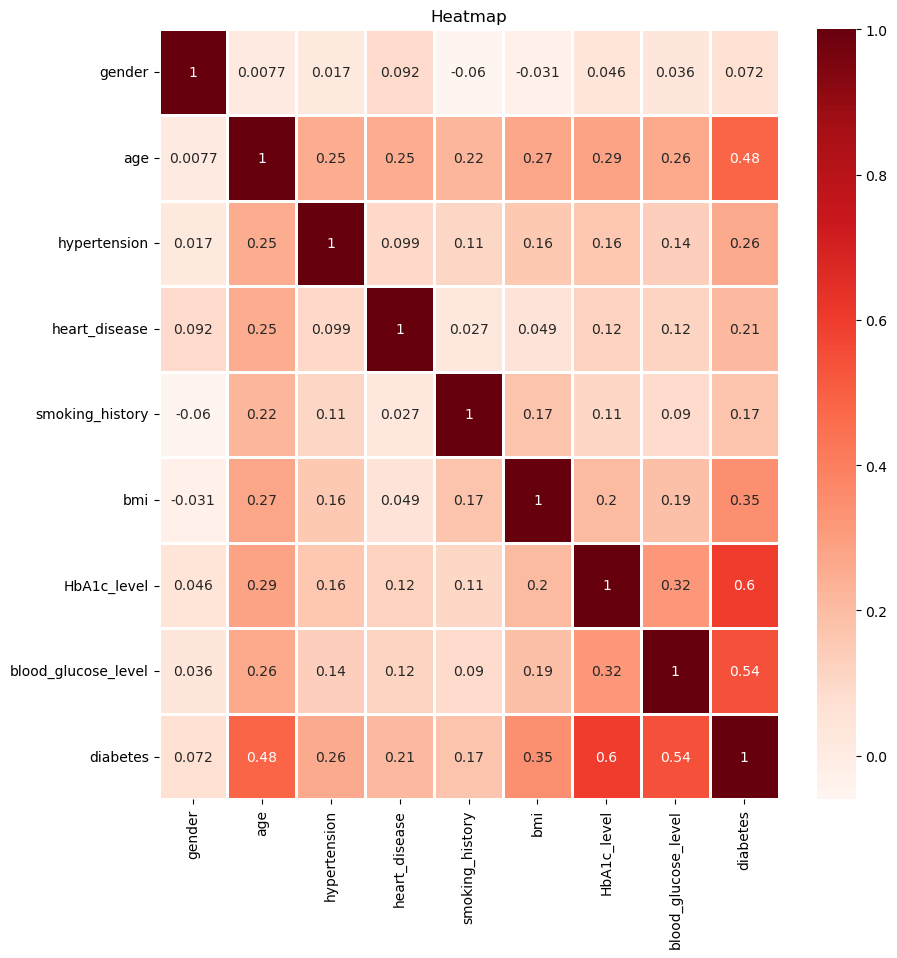

In [124]:
plt.figure(figsize = (10,10))
heatmap = sns.heatmap(data_cor,linewidth = 1,annot = True,cmap = plt.cm.Reds)
plt.title("Heatmap")
plt.show()

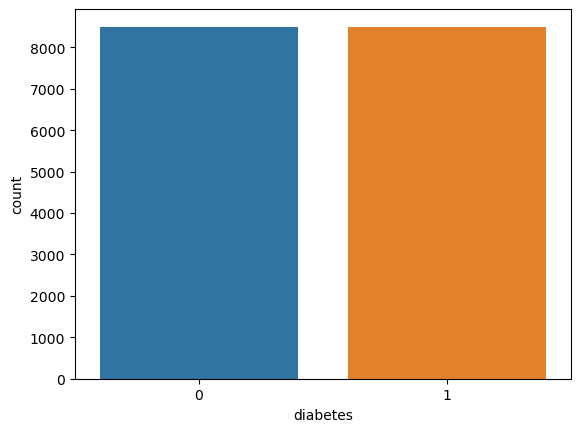

In [125]:
sns.countplot(x="diabetes",data=class0_1)
plt.show()

In [126]:
#o_x=class1_0.iloc[:,0:-1]
#o_y=class1_0.iloc[:,-1]

In [127]:
#o_y.head(2)

In [128]:
#oxtr,oxte,oytr,oyte=train_test_split(o_x,o_y,test_size=0.2,random_state=100)

In [129]:
#oxtr.shape,oxte.shape,oytr.shape,oyte.shape

# 1.Logistic Regression

In [130]:
lr.fit(xtr,ytr)

LogisticRegression()

In [131]:
ulr_p=lr.predict(xte)
ulr_p

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [132]:
#confusion matrix

In [133]:
ulr_cf=confusion_matrix(ulr_p,yte)
ulr_cf

array([[1515,  176],
       [ 193, 1516]], dtype=int64)

In [134]:
ulr_ac=ulr_cf.diagonal().sum()/ulr_cf.sum()*100
ulr_ac

89.1470588235294

In [135]:
print(classification_report(ulr_p,yte))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1691
           1       0.90      0.89      0.89      1709

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400



In [136]:
lg_pre_score= precision_score(yte,ulr_p)
lg_re_score= recall_score(yte,ulr_p)
lg_f1_score= f1_score(yte,ulr_p)
lg_pre_score,lg_re_score,lg_f1_score

(0.8870684610883558, 0.8959810874704491, 0.8915024992649221)

# 2.DT

In [137]:
dt.fit(xtr,ytr)

DecisionTreeClassifier()

In [138]:
udt_p=dt.predict(xte)
udt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
#confusion matrix

In [140]:
udt_cf=confusion_matrix(udt_p,yte)
udt_cf

array([[1488,  188],
       [ 220, 1504]], dtype=int64)

In [141]:
udt_ac=udt_cf.diagonal().sum()/udt_cf.sum()*100
udt_ac

88.0

In [142]:
print(classification_report(udt_p,yte))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1676
           1       0.89      0.87      0.88      1724

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



In [143]:
dt_pre_score= precision_score(yte,udt_p)
dt_re_score= recall_score(yte,udt_p)
dt_f1_score= f1_score(yte,udt_p)
dt_pre_score,dt_re_score,dt_f1_score

(0.8723897911832946, 0.8888888888888888, 0.8805620608899297)

# 3.RF

In [144]:
rf.fit(xtr,ytr)

RandomForestClassifier()

In [145]:
urf_p=rf.predict(xte)
urf_p

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [146]:
#confusion matrix

In [147]:
urf_cf=confusion_matrix(urf_p,yte)
urf_cf

array([[1535,  125],
       [ 173, 1567]], dtype=int64)

In [148]:
urf_ac=urf_cf.diagonal().sum()/urf_cf.sum()*100
urf_ac

91.23529411764706

In [149]:
print(classification_report(urf_p,yte))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1660
           1       0.93      0.90      0.91      1740

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [150]:
rf_pre_score= precision_score(yte,urf_p)
rf_re_score= recall_score(yte,urf_p)
rf_f1_score= f1_score(yte,urf_p)
rf_pre_score,rf_re_score,rf_f1_score

(0.9005747126436782, 0.9261229314420804, 0.9131701631701632)

# 4.KNN

In [151]:
knn.fit(xtr,ytr)

KNeighborsClassifier()

In [152]:
uk_p=knn.predict(xte)
uk_p

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [153]:
#confusion matrix

In [154]:
uk_cf=confusion_matrix(uk_p,yte)
uk_cf

array([[1445,  204],
       [ 263, 1488]], dtype=int64)

In [155]:
uk_ac=uk_cf.diagonal().sum()/uk_cf.sum()*100
uk_ac

86.26470588235294

In [156]:
print(classification_report(uk_p,yte))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1649
           1       0.88      0.85      0.86      1751

    accuracy                           0.86      3400
   macro avg       0.86      0.86      0.86      3400
weighted avg       0.86      0.86      0.86      3400



In [157]:
knn_pre_score= precision_score(yte,uk_p)
knn_re_score= recall_score(yte,uk_p)
knn_f1_score= f1_score(yte,uk_p)
knn_pre_score,knn_re_score,knn_f1_score

(0.8498001142204454, 0.8794326241134752, 0.8643624745861167)

# 5.SVM

In [158]:
svc.fit(xtr,ytr)

SVC()

In [159]:
us_p=svc.predict(xte)
us_p

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [160]:
#confusion matrix

In [161]:
us_cf=confusion_matrix(us_p,yte)
us_cf

array([[1403,  148],
       [ 305, 1544]], dtype=int64)

In [162]:
us_ac=us_cf.diagonal().sum()/us_cf.sum()*100
us_ac

86.6764705882353

In [163]:
print(classification_report(us_p,yte))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1551
           1       0.91      0.84      0.87      1849

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [164]:
svm_pre_score= precision_score(yte,us_p)
svm_re_score= recall_score(yte,us_p)
svm_f1_score= f1_score(yte,us_p)
svm_pre_score,svm_re_score,svm_f1_score

(0.8350459707950243, 0.9125295508274232, 0.872070036712793)

# 6.NB

In [165]:
nb.fit(xtr,ytr)

MultinomialNB()

In [166]:
un_p=nb.predict(xte)
un_p

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [167]:
#confusion matrix

In [168]:
un_cf=confusion_matrix(un_p,yte)
un_cf

array([[1134,  524],
       [ 574, 1168]], dtype=int64)

In [169]:
un_ac=un_cf.diagonal().sum()/un_cf.sum()*100
un_ac

67.70588235294117

In [170]:
print(classification_report(un_p,yte))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1658
           1       0.69      0.67      0.68      1742

    accuracy                           0.68      3400
   macro avg       0.68      0.68      0.68      3400
weighted avg       0.68      0.68      0.68      3400



In [171]:
nb_pre_score= precision_score(yte,un_p)
nb_re_score= recall_score(yte,un_p)
nb_f1_score= f1_score(yte,un_p)
nb_pre_score,nb_re_score,nb_f1_score

(0.6704936854190585, 0.6903073286052009, 0.6802562609202096)

# 7.XGB

In [172]:
xgb.fit(xtr,ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [173]:
uxg_p=xgb.predict(xte)
uxg_p

array([0, 0, 1, ..., 1, 0, 0])

In [174]:
#confusion matrix

In [175]:
uxg_cf=confusion_matrix(uxg_p,yte)
uxg_cf

array([[1544,  112],
       [ 164, 1580]], dtype=int64)

In [176]:
uxg_ac=uxg_cf.diagonal().sum()/uxg_cf.sum()*100
uxg_ac

91.88235294117646

In [177]:
print(classification_report(uxg_p,yte))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1656
           1       0.93      0.91      0.92      1744

    accuracy                           0.92      3400
   macro avg       0.92      0.92      0.92      3400
weighted avg       0.92      0.92      0.92      3400



In [178]:
xgb_pre_score= precision_score(yte,uxg_p)
xgb_re_score= recall_score(yte,uxg_p)
xgb_f1_score= f1_score(yte,uxg_p)
xgb_pre_score,xgb_re_score,xgb_f1_score

(0.9059633027522935, 0.933806146572104, 0.919674039580908)

In [179]:
list1=["LG","DT","RF","KNN","SVM","NB","XG_B"]
list2=[ulr_ac,udt_ac,urf_ac,uk_ac,us_ac,un_ac,uxg_ac]
list3=[lg_pre_score,dt_pre_score,rf_pre_score,knn_pre_score,svm_pre_score,nb_pre_score,xgb_pre_score]
list4=[lg_re_score,dt_re_score,rf_re_score,knn_re_score,svm_re_score,nb_re_score,xgb_re_score]
list5=[lg_f1_score,dt_f1_score,rf_f1_score,knn_f1_score,svm_f1_score,nb_f1_score,xgb_f1_score]

In [180]:
rus= pd.DataFrame({"Under_sampling":list1,"accuracy":list2,"precision":list3,"recall":list4,"f1score":list5})
rus

,Under_sampling,accuracy,precision,recall,f1score
0,LG,89.147059,0.887068,0.895981,0.891502
1,DT,88.000000,0.872390,0.888889,0.880562
2,RF,91.235294,0.900575,0.926123,0.913170
3,KNN,86.264706,0.849800,0.879433,0.864362
4,SVM,86.676471,0.835046,0.912530,0.872070
5,NB,67.705882,0.670494,0.690307,0.680256
6,XG_B,91.882353,0.905963,0.933806,0.919674


# Conclusion:
Out of these models,after treating class imbalance with Random oversampling Random Forest, XGBoost is better with good accuracy,precision,recall and f1 score compared to others. so Perform Feature Selection in these Two models.

# Feature Selection

In [181]:
rf.feature_importances_

array([0.00896161, 0.1841833 , 0.02265247, 0.01335835, 0.03482054,
       0.11801417, 0.35305553, 0.26495403])

In [182]:
f_rf=pd.DataFrame({"importances":list(rf.feature_importances_),"columns":list(c_x)})
f_rf

,importances,columns
0,0.008962,gender
1,0.184183,age
2,0.022652,hypertension
3,0.013358,heart_disease
4,0.034821,smoking_history
5,0.118014,bmi
6,0.353056,HbA1c_level
7,0.264954,blood_glucose_level


In [183]:
new_x= c_x.drop(["gender","hypertension","heart_disease","smoking_history"],axis=1)

In [184]:
x_tr,x_te,y_tr,y_te=train_test_split(new_x,c_y,test_size=0.2,random_state=100)

In [185]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((13600, 4), (3400, 4), (13600,), (3400,))

# Decision Tree

In [186]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [187]:
fdt_p=dt.predict(x_te)
fdt_p

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [188]:
fdt_prob=dt.predict_proba(x_te)
fdt_prob

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [189]:
fdt_cf=confusion_matrix(fdt_p,y_te)
fdt_cf

array([[1491,  222],
       [ 217, 1470]], dtype=int64)

In [190]:
fdt_ac=fdt_cf.diagonal().sum()/fdt_cf.sum()*100
fdt_ac

87.08823529411764

In [191]:
print(classification_report(fdt_p,y_te))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1713
           1       0.87      0.87      0.87      1687

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [192]:
fs_dt_pre_score= precision_score(y_te,fdt_p)
fs_dt_re_score= recall_score(y_te,fdt_p)
fs_dt_f1_score= f1_score(y_te,fdt_p)
fs_dt_pre_score,fs_dt_re_score,fs_dt_f1_score

(0.8713692946058091, 0.8687943262411347, 0.8700799052974252)

In [193]:
#fdt_df=pd.DataFrame(fdt_prob)
#dt_df

# Random Forest

In [194]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [195]:
frf_p=rf.predict(x_te)
frf_p

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [196]:
frf_cf=confusion_matrix(frf_p,y_te)
frf_cf

array([[1519,  154],
       [ 189, 1538]], dtype=int64)

In [197]:
frf_ac=frf_cf.diagonal().sum()/frf_cf.sum()*100
frf_ac

89.91176470588236

In [198]:
print(classification_report(frf_p,y_te))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1673
           1       0.91      0.89      0.90      1727

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [199]:
fs_rf_pre_score= precision_score(y_te,frf_p)
fs_rf_re_score= recall_score(y_te,frf_p)
fs_rf_f1_score= f1_score(y_te,frf_p)
fs_rf_pre_score,fs_rf_re_score,fs_rf_f1_score

(0.8905616676317313, 0.9089834515366431, 0.8996782684995612)

# XG Boost

In [200]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [201]:
fxg_p=xgb.predict(x_te)
fxg_p

array([1, 0, 1, ..., 1, 0, 0])

In [202]:
fxg_cf=confusion_matrix(fxg_p,y_te)
fxg_cf

array([[1514,  119],
       [ 194, 1573]], dtype=int64)

In [203]:
fxg_ac=fxg_cf.diagonal().sum()/fxg_cf.sum()*100
fxg_ac

90.79411764705883

In [204]:
print(classification_report(fxg_p,y_te))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.93      0.89      0.91      1767

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [205]:
fs_xg_pre_score= precision_score(y_te,fxg_p)
fs_xg_re_score= recall_score(y_te,fxg_p)
fs_xg_f1_score= f1_score(y_te,fxg_p)
fs_xg_pre_score,fs_xg_re_score,fs_xg_f1_score

(0.8902093944538766, 0.9296690307328606, 0.9095114194854004)

In [206]:
ls_f_rfe1=["Decision Tree","Random Forest","XG_Boost"]
ls_f_rfe2=[fdt_ac,frf_ac,fxg_ac]
ls_f_rfe3=[fs_dt_pre_score,fs_rf_pre_score,fs_xg_pre_score]
ls_f_rfe4=[fs_dt_re_score,fs_rf_re_score,fs_xg_re_score]
ls_f_rfe5=[fs_dt_f1_score,fs_rf_f1_score,fs_xg_f1_score]

In [207]:
final_rf = pd.DataFrame({"Feature_RF":ls_f_rfe1,"Accuracy":ls_f_rfe2,"Precision":ls_f_rfe3,"Recall":ls_f_rfe4,"F1_Score":ls_f_rfe5})
final_rf

,Feature_RF,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,87.088235,0.871369,0.868794,0.870080
1,Random Forest,89.911765,0.890562,0.908983,0.899678
2,XG_Boost,90.794118,0.890209,0.929669,0.909511


In [208]:
xg_prob=xgb.predict_proba(x_te)
xg_df=pd.DataFrame(xg_prob)
xg_df

,0,1
0,0.466585,0.533415
1,0.999966,0.000034
2,0.489608,0.510392
3,0.995248,0.004752
4,0.681147,0.318853
...,...,...
3395,0.183336,0.816664
3396,0.000096,0.999904
3397,0.371659,0.628341
3398,0.999579,0.000421


# PRC Curve

In [209]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [210]:
xg_precision,xg_recall,xg_threshold=precision_recall_curve(y_te,xg_df.iloc[:,1])

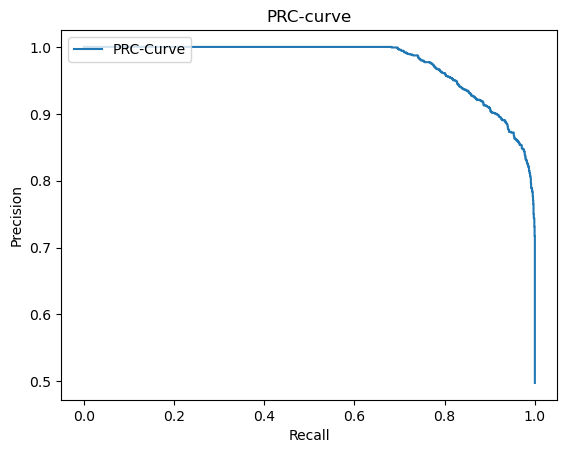

In [211]:
plt.plot(xg_recall,xg_precision,label="PRC-Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-curve")
plt.show()

# Comparison for all model dataframe

In [212]:
display(Basemodel_final,rus,final_rf)

,basemodel name,accuracy,precision,recall,f1score
0,LG,95.865,0.837321,0.627615,0.717458
1,DT,95.430,0.837321,0.627615,0.717458
2,RF,97.095,0.944625,0.693365,0.799724
3,KNN,95.480,0.876592,0.534967,0.664439
4,SVM,95.010,1.000000,0.403467,0.574957
5,NB,90.390,0.392580,0.271967,0.321328
6,XG_B,97.205,0.958059,0.696354,0.806507


,Under_sampling,accuracy,precision,recall,f1score
0,LG,89.147059,0.887068,0.895981,0.891502
1,DT,88.000000,0.872390,0.888889,0.880562
2,RF,91.235294,0.900575,0.926123,0.913170
3,KNN,86.264706,0.849800,0.879433,0.864362
4,SVM,86.676471,0.835046,0.912530,0.872070
5,NB,67.705882,0.670494,0.690307,0.680256
6,XG_B,91.882353,0.905963,0.933806,0.919674


,Feature_RF,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,87.088235,0.871369,0.868794,0.870080
1,Random Forest,89.911765,0.890562,0.908983,0.899678
2,XG_Boost,90.794118,0.890209,0.929669,0.909511


# Cross Validation

In [213]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import  accuracy_score,make_scorer
import xgboost as xgb
model=xgb.XGBClassifier()
num_folds=5
kf=KFold(n_splits=num_folds)
scores=cross_val_score(model,new_x,c_y,cv=kf,scoring="accuracy")
print(f"Mean Accuracy={scores.mean():.2f}")
from sklearn.model_selection import cross_val_predict
predicted_labels=cross_val_predict(model,new_x,c_y,cv=5)
precision=precision_score(c_y,predicted_labels)
recall=recall_score(c_y,predicted_labels)
f1=f1_score(c_y,predicted_labels)
accuracy=accuracy_score(c_y,predicted_labels)

Mean Accuracy=0.86


In [214]:
l1=[accuracy]
l2=[precision]
l3=[recall]
l4=[f1]

In [215]:
cross_val=pd.DataFrame({"ModelName":"KFold Crossvalidation","Accuracy":l1,"Precision":l2,"Recall":l3,"F1-score":l4})
cross_val 

,ModelName,Accuracy,Precision,Recall,F1-score
0,KFold Crossvalidation,0.901647,0.893409,0.912118,0.902666


# Conclusion

After this cross validation, accuracy, precision, recall, f1score are good. we can conclude that the model is accurate and reliable in making Analysis and Prediction, it is likely a good choice for solving the regression problem.